<a href="https://colab.research.google.com/github/kh-ops69/Data_science/blob/master/Disease_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/lSyNUwR.png width=700>

### The Data Source

Dr Semmelweis published his research in 1861. Pages of the [full text with the original tables in German] can be found at (http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

### Upgrade plotly (only Google Colab Notebook)

In [ ]:
# %pip install --upgrade plotly

### Import Statements

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import ttest_ind

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [ ]:
df_yearly = pd.read_csv('Data/annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('Data/monthly_deaths.csv',
                      parse_dates=['date'])

# Preliminary Data Exploration


In [ ]:
df_yearly.shape, df_monthly.shape, df_yearly.columns, df_monthly.columns

((12, 4),
 (98, 3),
 Index(['year', 'births', 'deaths', 'clinic'], dtype='object'),
 Index(['date', 'births', 'deaths'], dtype='object'))

In [ ]:
df_yearly.info

<bound method DataFrame.info of     year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2>

In [ ]:
df_yearly.isna().values.any(), df_monthly.isna().values.any()

(False, False)

In [ ]:
df_yearly.duplicated(), df_monthly.duplicated()

(0     False
 1     False
 2     False
 3     False
 4     False
 5     False
 6     False
 7     False
 8     False
 9     False
 10    False
 11    False
 dtype: bool, 0     False
 1     False
 2     False
 3     False
 4     False
       ...  
 93    False
 94    False
 95    False
 96    False
 97    False
 Length: 98, dtype: bool)

In [ ]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


### Check for Nan Values and Duplicates

### Descriptive Statistics

### Percentage of Women Dying in Childbirth

 Calculating the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [ ]:
df_monthly.births.sum()/df_monthly.deaths.sum()

11.88283378746594

# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

In [ ]:
df_yearly.year[:6]

0    1841
1    1842
2    1843
3    1844
4    1845
5    1846
Name: year, dtype: int64

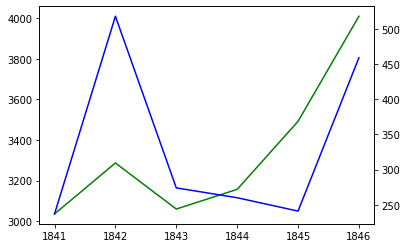

In [ ]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df_yearly.year[:6], df_yearly.births[:6], color='g')
ax2.plot(df_yearly.year[:6], df_yearly.deaths[:6], 'b')


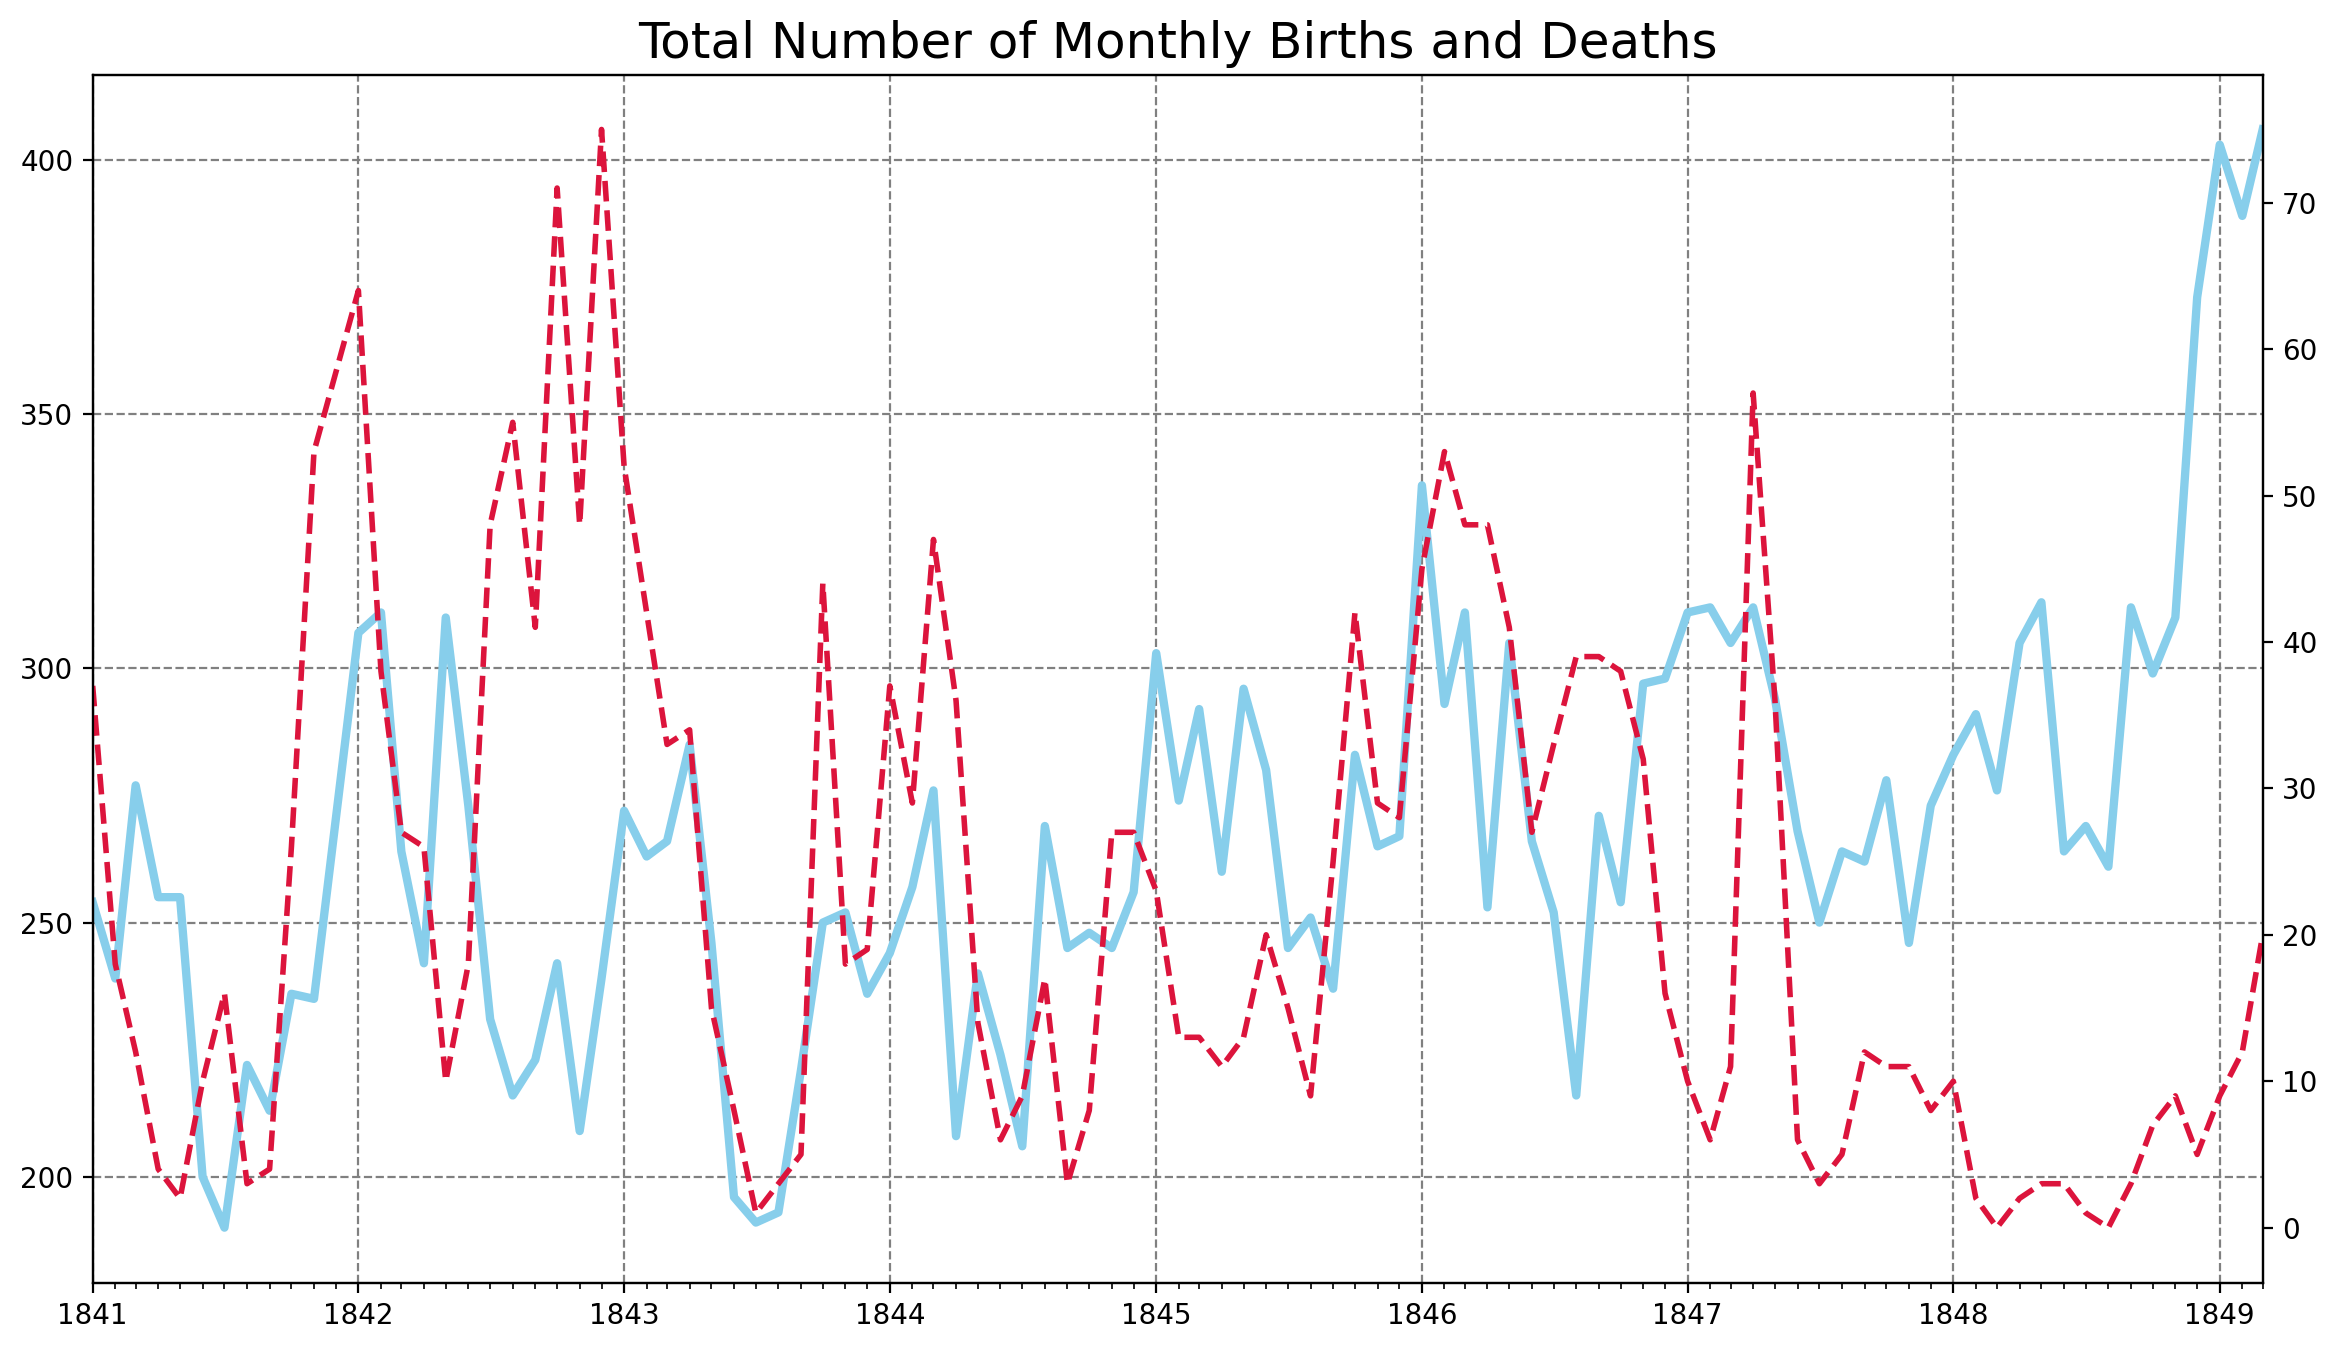

In [ ]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')

ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_monthly.date,
         df_monthly.births,
         color='skyblue',
         linewidth=3)

ax2.plot(df_monthly.date,
         df_monthly.deaths,
         color='crimson',
         linewidth=2,
         linestyle='--')

plt.show()

# The Yearly Data Split by Clinic

Creating line charts of the births and deaths of the two different clinics at the Vienna General Hospital to visualise the answers to some questions:

* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time?
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [ ]:
df_yearly.clinic.value_counts()[0]

6

In [ ]:
df_yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [ ]:
line = px.line(df_yearly,
               x='year',
               y='births',
               color='clinic',
               title='Total Yearly Births by Clinic')

line.show()

### Calculate the Proportion of Deaths at Each Clinic

In [ ]:
df_yearly['pct_deaths'] = df_yearly.deaths/df_yearly.births *100

df_yearly.query('clinic == "clinic 1"').mean(), df_yearly.query('clinic == "clinic 2"').mean()

<ipython-input-47-68d1820d904b>:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



(year         1,843.50
 births       3,340.33
 deaths         331.50
 pct_deaths       9.85
 dtype: float64, year         1,843.50
 births       2,965.17
 deaths         115.17
 pct_deaths       4.04
 dtype: float64)

In [ ]:
lin = px.line(df_yearly,
               x='year',
               y='pct_deaths',
               color='clinic',
               title='Total Yearly Births by Clinic')

lin.show()

In [ ]:
df_yearly.query('clinic == "clinic 1"')

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,7.81
1,1842,3287,518,clinic 1,15.76
2,1843,3060,274,clinic 1,8.95
3,1844,3157,260,clinic 1,8.24
4,1845,3492,241,clinic 1,6.90
5,1846,4010,459,clinic 1,11.45


### Plotting the Proportion of Yearly Deaths by Clinic

In [ ]:
df_monthly['pct_deaths'] = df_monthly.deaths/df_monthly.births

In [ ]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

In [ ]:
before_washing = df_monthly[df_monthly.date < handwashing_start]
after_washing = df_monthly[df_monthly.date >= handwashing_start]

In [ ]:
bw_rate = before_washing.deaths.sum() / before_washing.births.sum() * 100
aw_rate = after_washing.deaths.sum() / after_washing.births.sum() * 100

### Calculate a Rolling Average of the Death Rate

In [ ]:
roll_df = before_washing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

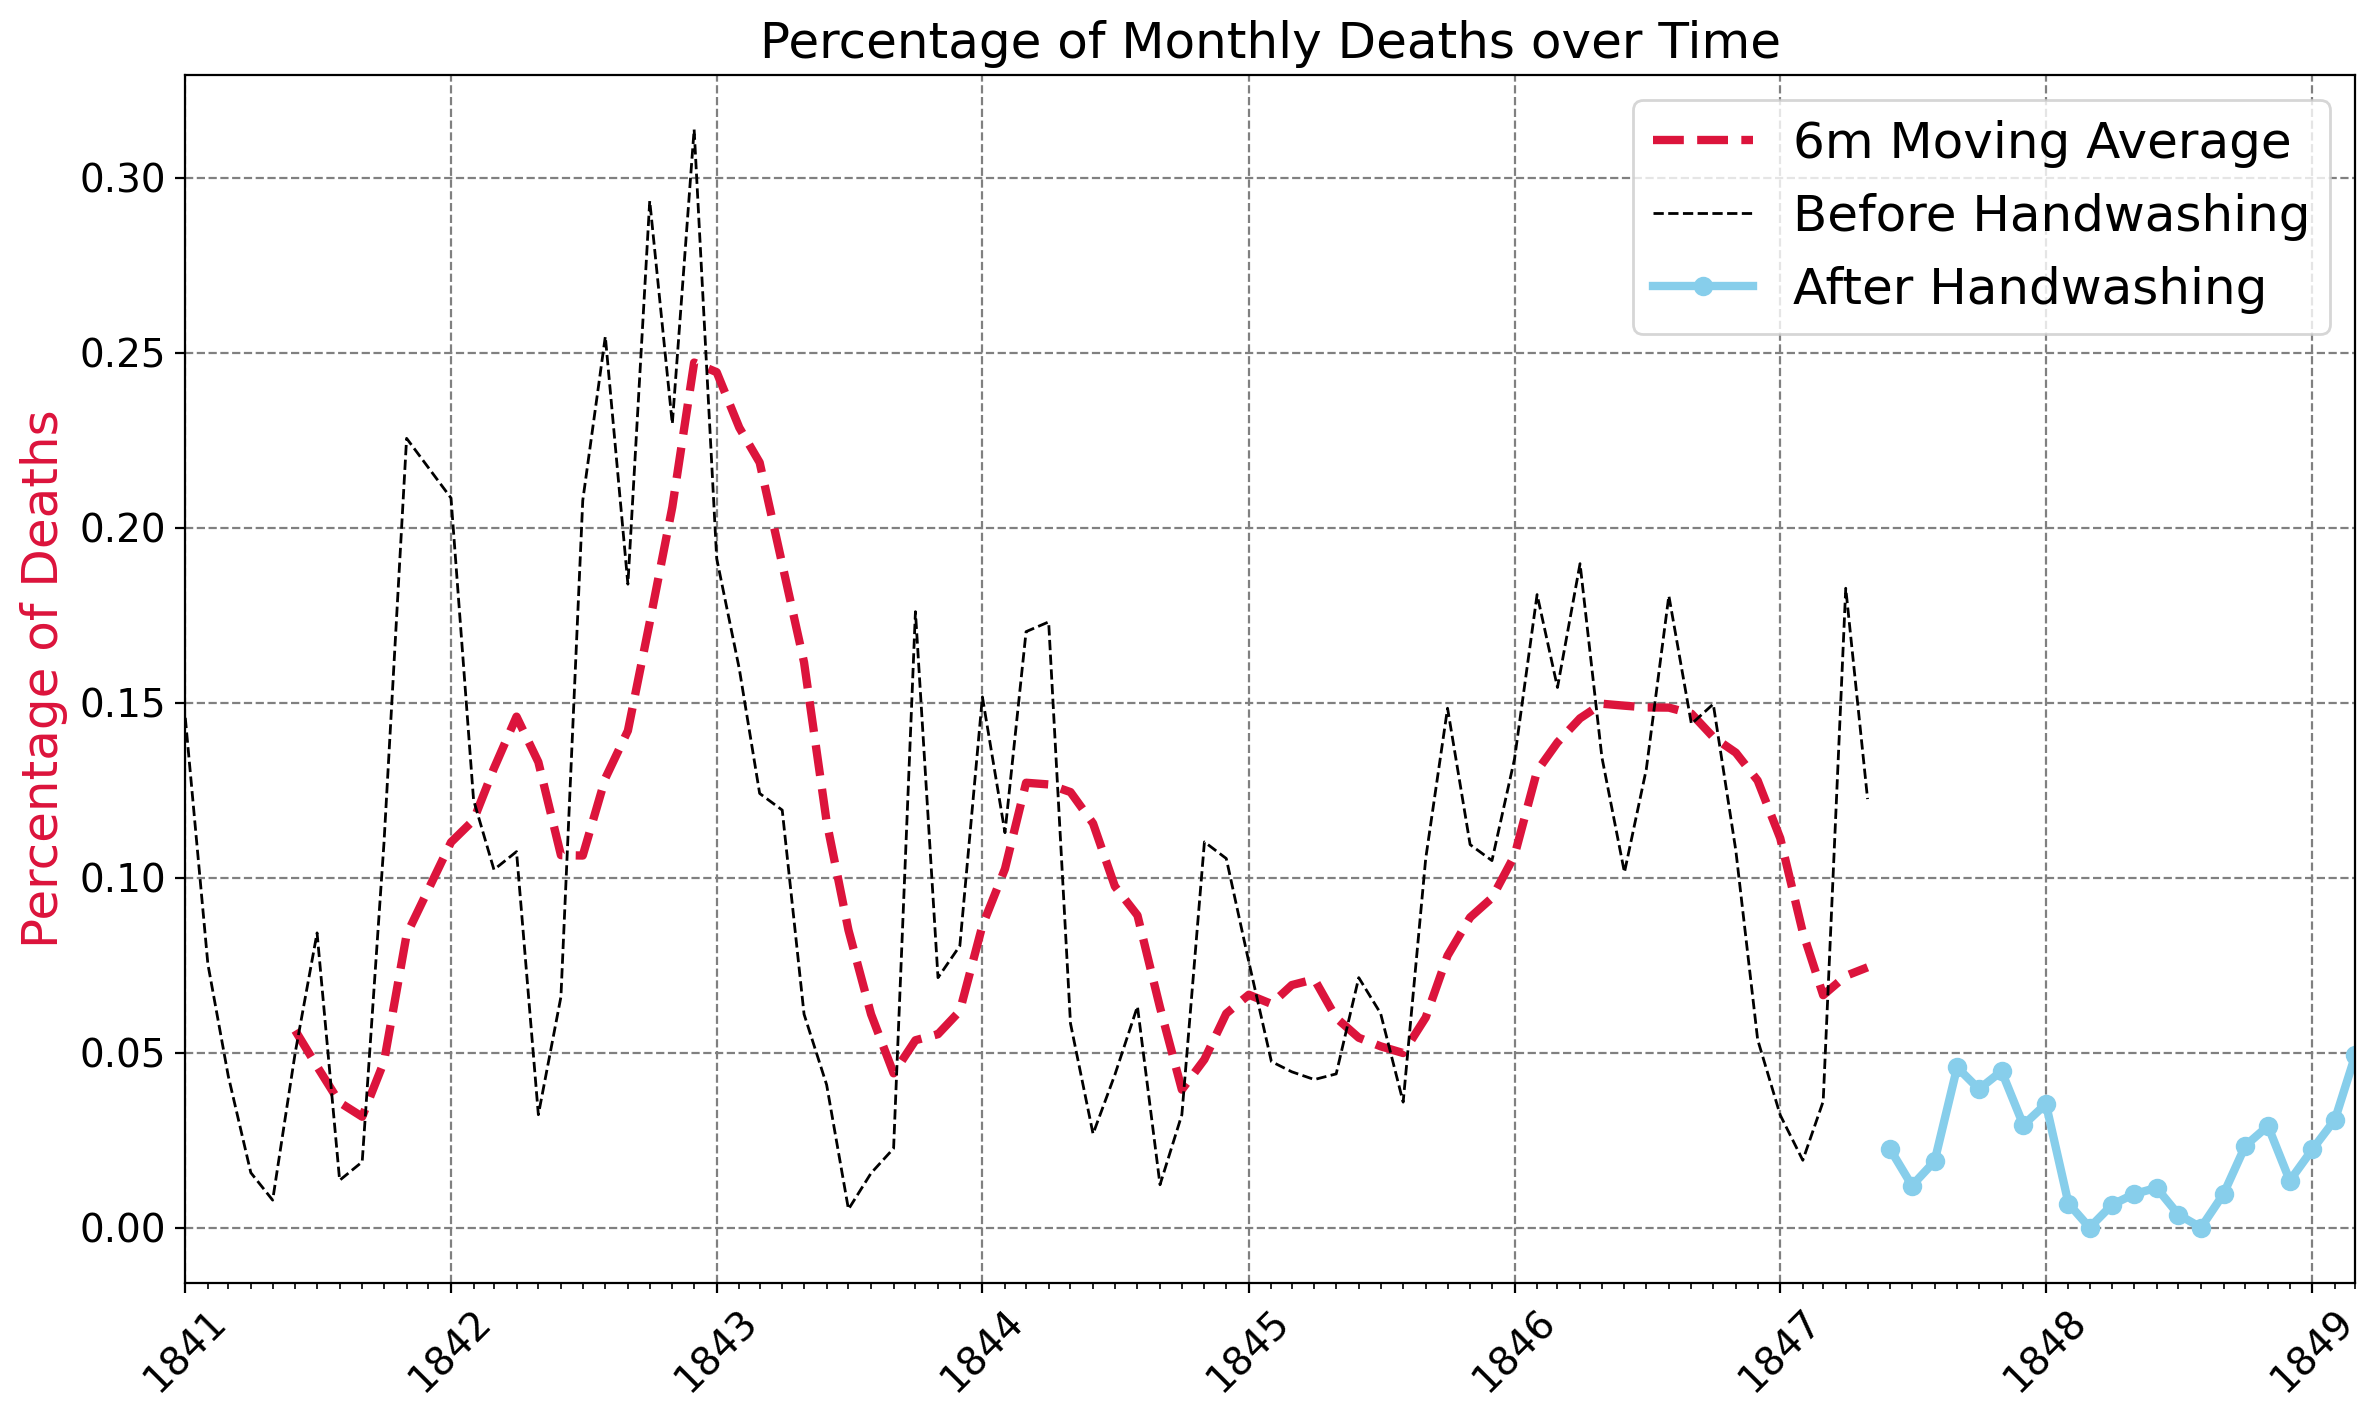

In [ ]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)

ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])

plt.grid(color='grey', linestyle='--')

ma_line, = plt.plot(roll_df.index,
                    roll_df.pct_deaths,
                    color='crimson',
                    linewidth=3,
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(before_washing.date,
                    before_washing.pct_deaths,
                    color='black',
                    linewidth=1,
                    linestyle='--',
                    label='Before Handwashing')
aw_line, = plt.plot(after_washing.date,
                    after_washing.pct_deaths,
                    color='skyblue',
                    linewidth=3,
                    marker='o',
                    label='After Handwashing')

plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)

plt.show()

In [ ]:
df_monthly

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.15
1,1841-02-01,239,18,0.08
2,1841-03-01,277,12,0.04
3,1841-04-01,255,4,0.02
4,1841-05-01,255,2,0.01
...,...,...,...,...
93,1848-11-01,310,9,0.03
94,1848-12-01,373,5,0.01
95,1849-01-01,403,9,0.02
96,1849-02-01,389,12,0.03


In [ ]:
df_monthly['before_or_after'] = np.where(df_monthly.date< handwashing_start, 'before', 'after')
df_monthly

,date,births,deaths,pct_deaths,before_or_after
0,1841-01-01,254,37,0.15,before
1,1841-02-01,239,18,0.08,before
2,1841-03-01,277,12,0.04,before
3,1841-04-01,255,4,0.02,before
4,1841-05-01,255,2,0.01,before
...,...,...,...,...,...
93,1848-11-01,310,9,0.03,after
94,1848-12-01,373,5,0.01,after
95,1849-01-01,403,9,0.02,after
96,1849-02-01,389,12,0.03,after


In [ ]:
box = px.box(df_monthly,
             x='before_or_after',
             y='pct_deaths',
             color='before_or_after',
             title='How Have the Stats Changed with Handwashing?')

box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)

box.show()

In [ ]:
hist = px.histogram(df_monthly,
                   x='pct_deaths',
                   color='before_or_after',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)

hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)

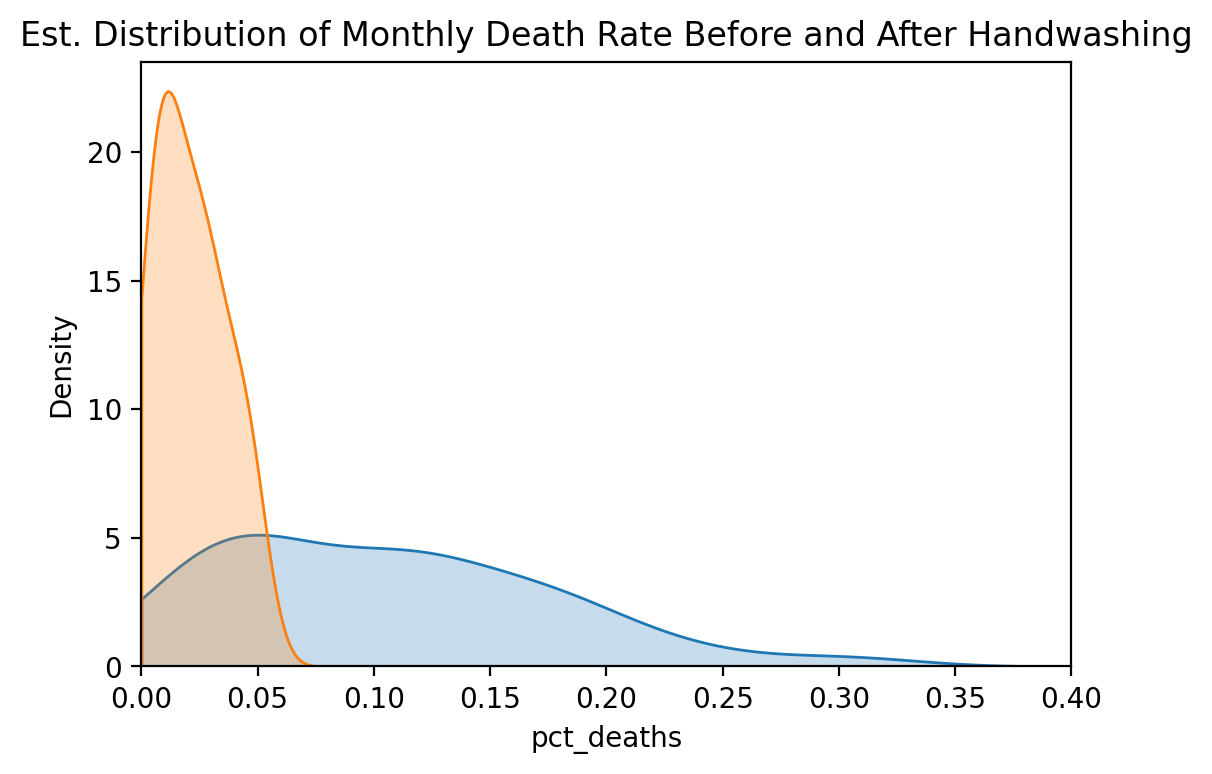

In [ ]:
plt.figure(dpi=200)
sns.kdeplot(before_washing.pct_deaths,
            shade=True,
            clip=(0,1))
sns.kdeplot(after_washing.pct_deaths,
            shade=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

In [ ]:
t_stat, p_value = ttest_ind(a=before_washing.pct_deaths,
                                  b=after_washing.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0000002985
t-statstic is 5.512


What do you conclude from your analysis, Doctor? 😊

<img src=https://i.imgur.com/rvjNVzQ.gif>